In [14]:
import numpy as np, math, re
import pandas as pd, sqlite3
import datetime, time, nltk
import matplotlib.pyplot as plt
from nltk import sentiment
from nltk.corpus import stopwords

In [ ]:
nltk.download("stopwords")

In [89]:
import emoji
import emosent

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [22]:
stop_words = set(stopwords.words("english"))

In [23]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [4]:
sid = SentimentIntensityAnalyzer()

In [123]:
sia_original = sentiment.SentimentIntensityAnalyzer()

In [6]:
sid.polarity_scores('money mouth face')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [7]:
lex = sid.lexicon

In [125]:
old_lex = sia_original.lexicon

In [59]:
emojiDict = sid.make_emoji_dict()
emosentiData = emosent.EMOJI_SENTIMENT_DICT

In [9]:
sid.polarity_scores("😩")

{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}

In [53]:
words_not_in_lex = set()
for emoji in emojiDict:
    descrip = emojiDict[emoji].split()
    for d in descrip:
        [words_not_in_lex.add(d.lower()) for d in descrip if d.lower().replace('”', "").replace("“", "").replace(":", "") not in lex.keys()]

In [54]:
len(words_not_in_lex)

1601

In [57]:
nltk.tokenize.##("You are well-groomed")

['You are well-groomed']

In [70]:
# updated Vader lexicon translates a comment's emojis to its description. Utilizing the same out-of-the-box VADER lexicon shipped with NLTK.
sid.polarity_scores("hugging face") == sid.polarity_scores("🤗")

True

In [11]:
sia_original.lexicon == lex

False

In [71]:
len(lex.keys())

7506

In [13]:
# original VADER lex has four less words
len(sia_original.lexicon.keys())

7502

In [72]:
for x in lex.keys():
    if x in sia_original.lexicon.keys(): next
    else:
        print(x)   

:P
heart
hearts
flawed


In [73]:
sentiment_data = []
missing_emojis = []
for emote in emojiDict: # all available Unicode emojis
    try:
        emosentiData[emote]
        sentiment_data.append(emote) # sentiment tagged emojis
    except KeyError:
        missing_emojis.append(emote)

In [97]:
len(missing_emojis)

2834

In [75]:
len(sentiment_data)

736

In [103]:
emosentiData[sentiment_data[0]]

{'unicode_codepoint': '0x1f600',
 'occurrences': 439,
 'position': 0.786284933,
 'negative': 37.0,
 'neutral': 114.0,
 'positive': 288.0,
 'unicode_name': 'GRINNING FACE',
 'unicode_block': 'Emoticons',
 'sentiment_score': 0.572}

In [107]:
f"{sentiment_data[0]} : {emosentiData[sentiment_data[0]]['unicode_name']}"

'😀 : GRINNING FACE'

In [132]:
sid.polarity_scores("lmao but grinning")

{'neg': 0.0, 'neu': 0.149, 'pos': 0.851, 'compound': 0.6908}

In [133]:
len(words_not_in_lex)

1601

In [134]:
clex_dic = {"Words": lex.keys(),
"Score": lex.values()}

In [135]:
lex_df = pd.DataFrame(clex_dic)

In [136]:
lex_df.sort_values("Score").tail(30)

,Words,Score
4227,joyous,3.1
310,lyl,3.1
934,awesome,3.1
2658,excellence,3.1
2663,excellently,3.1
5029,peacefullest,3.1
3074,freedom,3.2
4443,love,3.2
76,143,3.2
2637,euphoric,3.2


In [81]:
conn = sqlite3.connect("data/discord/discord.db")

In [82]:
discord_comments_df = pd.read_sql("SELECT * FROM DiscordCommentsThursdayData", con=conn, index_col="index")

In [83]:
conn.close()

In [112]:
discord_comments_df.tail()

,ID,Name,Message,Time,Datetime,Date,UnixTimeStamp,EasternDT,Mentions,IsBot,Emojis,mentionedStock,Excam,MentionedUsers,MentionedStocks
index,,,,,,,,,,,,,,,
5076,663395442645663764,stocky#9277,$rope,20:58:05.959000,2020-05-01 20:58:05.959000+00:00,2020-05-01,1.588367e+09,2020-05-01 15:58:05.959000-05:00,,Human,,ROPE,0,,
5077,449633258116874250,dakotared#3395,quick scalp on $SCWX with Dell buying out the ...,18:48:28.342000,2019-12-23 18:48:28.342000+00:00,2019-12-23,1.577127e+09,2019-12-23 13:48:28.342000-05:00,,Human,,SCWX,0,,"on, dell, out"
5078,555027629036535819,Fill That Gap#0777,$SGBX I was pretty sloppy on. Became patient w...,01:20:54.209000,2020-10-17 01:20:54.209000+00:00,2020-10-17,1.602898e+09,2020-10-16 20:20:54.209000-05:00,,Human,,SGBX,0,,out
5079,674648888279302204,GOOFYSPY#8332,$TSLA 💯DIS 💯 Uvxy 💯 QQQ 💯,21:13:57.291000,2020-02-27 21:13:57.291000+00:00,2020-02-27,1.582838e+09,2020-02-27 16:13:57.291000-05:00,,Human,💯 💯 💯 💯,TSLA,0,,"dis, uvxy, qqq"
5080,540290732708069393,J. Gatsby#2868,@everyone If anyone was in Voice this morning ...,20:05:15.697000,2020-08-20 20:05:15.697000+00:00,2020-08-20,1.597954e+09,2020-08-20 15:05:15.697000-05:00,"<@540290732708069393>, <@689681229989150742>, ...",Human,,TSLA V Z PTON,1,"J. Gatsby, jackaplan, Ant, NiKa","all, well, on"


In [90]:
emoji

<module 'emoji' from 'C:\\Users\\Kyle\\anaconda3\\lib\\site-packages\\emoji\\__init__.py'>

In [91]:
used_emojis = {}
def usedEmojis(emoj):
    if emoj == "": next
    used_emojis_list = emoji.emoji_lis(emoj)
    for emote in used_emojis_list:
        if emote["emoji"] in used_emojis.keys():      
            used_emojis[emote["emoji"]] += 1
        else:
            used_emojis[emote["emoji"]] = 1

In [92]:
discord_comments_df.Emojis.apply(usedEmojis)

index
0       None
1       None
2       None
3       None
4       None
        ... 
5076    None
5077    None
5078    None
5079    None
5080    None
Name: Emojis, Length: 5081, dtype: object

In [113]:
used_emojis

{'🐠': 2,
 '🐟': 2,
 '😦': 4,
 '🤑': 34,
 '🔥': 80,
 '😭': 6,
 '💦': 3,
 '👍': 33,
 '💴': 4,
 '💰': 28,
 '🙂': 24,
 '🤯': 3,
 '😢': 1,
 '🎬': 2,
 '😩': 1,
 '😅': 5,
 '💯': 24,
 '😂': 50,
 '😎': 9,
 '🙌': 12,
 '🏻': 26,
 '😉': 23,
 '👀': 11,
 '🤗': 1,
 '☝': 1,
 '😱': 1,
 '🏽': 6,
 '🤔': 6,
 '🤣': 9,
 '😆': 4,
 '💥': 3,
 '👑': 1,
 '🙏': 51,
 '😋': 3,
 '😘': 1,
 '😲': 2,
 '🚂': 3,
 '😁': 6,
 '😔': 1,
 '👌': 18,
 '\U0001f9c3': 3,
 '🥺': 1,
 '🤬': 1,
 '🐢': 1,
 '😄': 5,
 '💪': 21,
 '👆': 1,
 '🇺': 1,
 '🇸': 1,
 '🐻': 1,
 '🚨': 3,
 '🧐': 2,
 '🔑': 1,
 '🤤': 1,
 '💸': 5,
 '🏃': 4,
 '💵': 6,
 '🐐': 5,
 '🤙': 5,
 '🏦': 1,
 '😳': 12,
 '😤': 2,
 '💎': 4,
 '🏿': 8,
 '🚀': 6,
 '✊': 3,
 '🍻': 3,
 '🥳': 5,
 '🤘': 1,
 '🤫': 4,
 '📈': 2,
 '😃': 2,
 '🦕': 1,
 '🏼': 36,
 '❤': 6,
 '🍳': 1,
 '🏄': 2,
 '🌊': 1,
 '🚼': 1,
 '✌': 2,
 '😍': 4,
 '🛥': 1,
 '👩': 2,
 '🚣': 1,
 '♀': 1,
 '💼': 1,
 '🤷': 7,
 '♂': 10,
 '😊': 1,
 '😒': 1,
 '🖐': 1,
 '🕵': 1,
 '🐮': 1,
 '🔔': 1,
 '🤩': 3,
 '🍔': 1,
 '👇': 18,
 '👉': 1,
 '💨': 3,
 '😬': 6,
 '✅': 2,
 '\U0001f9be': 1,
 '🤦': 2,
 '👏': 2,
 '🥰': 2,
 '🍎': 2,
 '🎉': 1,
 

In [114]:
hasSentiment = {}
for k in list(used_emojis.keys()):
    try:
        projSent = emosent.get_emoji_sentiment_rank(k)
        projSent = projSent["sentiment_score"]
        hasSentiment[k] = projSent
    except:
        hasSentiment[k] = "No sentiment available."

In [115]:
hasSentiment

{'🐠': 0.462,
 '🐟': 0.724,
 '😦': -0.389,
 '🤑': 'No sentiment available.',
 '🔥': 0.14,
 '😭': -0.093,
 '💦': 0.476,
 '👍': 0.522,
 '💴': -0.25,
 '💰': 0.256,
 '🙂': 'No sentiment available.',
 '🤯': 'No sentiment available.',
 '😢': 0.007,
 '🎬': 0.3,
 '😩': -0.368,
 '😅': 0.18,
 '💯': 0.121,
 '😂': 0.221,
 '😎': 0.493,
 '🙌': 0.56,
 '🏻': 'No sentiment available.',
 '😉': 0.464,
 '👀': 0.063,
 '🤗': 'No sentiment available.',
 '☝': 0.314,
 '😱': 0.19,
 '🏽': 'No sentiment available.',
 '🤔': 'No sentiment available.',
 '🤣': 'No sentiment available.',
 '😆': 0.412,
 '💥': 0.149,
 '👑': 0.701,
 '🙏': 0.418,
 '😋': 0.634,
 '😘': 0.702,
 '😲': -0.07,
 '🚂': 0.308,
 '😁': 0.45,
 '😔': -0.146,
 '👌': 0.564,
 '\U0001f9c3': 'No sentiment available.',
 '🥺': 'No sentiment available.',
 '🤬': 'No sentiment available.',
 '🐢': 0.216,
 '😄': 0.422,
 '💪': 0.556,
 '👆': 0.333,
 '🇺': 0.563,
 '🇸': 0.527,
 '🐻': 0.468,
 '🚨': 0.673,
 '🧐': 'No sentiment available.',
 '🔑': 0.25,
 '🤤': 'No sentiment available.',
 '💸': 0.167,
 '🏃': 0.415,
 '💵': 0

In [116]:
emote_comments = discord_comments_df[discord_comments_df.Emojis != ""]

In [117]:
raw_messages = emote_comments.Message.values

In [137]:
raw_messages

array(['Just keep trimming trimming 🐠 🐟',
       'I need some luck to see these gains. 😦',
       '10 minutes in that play haha 🤑🤑',
       'also shoutout to <@!579205396166737921> for the signal 🔥',
       'So glad I got on BA😭', '💦💦💦',
       'Tried selling but it did not go through 😦', 'Jeez nice 👍',
       'Awesome <@367506726582484996> that’s why your name is purple. Patience pays 💴 💰',
       'pog 🙂', 'noice 🙂', '🤯🤯🤯', 'But mine is a negative 😢',
       'First day wakin up actually n tradin 🎬🎬fuckin movie',
       'Those look nice!👍',
       "<@579205396166737921> what's the difference between your spy and mine 😩",
       '<@!432049873563680786> thank you for your 🔥🔥FIRE  List everyday!🔥🔥 Chatroom with voicechat and team members is really thatvwork',
       'Btw I’m j a newbie, only 17yrs old😅',
       'Made some lunch money while I’m in class 💯 shout-out <@!579205396166737921>',
       '<@!432049873563680786> 👍 learning a lot. Got in on the close of the second candle. Have a lot

In [139]:
sid.polarity_scores('When the 🐻 shows up, we take his money! Thank you coronavirus')

{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4199}

In [140]:
sid.polarity_scores('Not a bad day. Let’s see if these BBBY swings moon tomorrow')

{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.431}

In [141]:
test_message = raw_messages[2]

In [142]:
sid.lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [146]:
sid.polarity_scores("😂")

{'neg': 0.218, 'neu': 0.345, 'pos': 0.437, 'compound': 0.4404}

In [148]:
sid.polarity_scores("bag")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [44]:
test_message

'10 minutes in that play haha 🤑🤑'

In [155]:
def stripAndScore(com):
    pattern = "<.+>"
    mentions = re.findall(pattern, com)
    for m in mentions:
        com=com.replace(m, "")
    return sid.polarity_scores(com)["compound"]

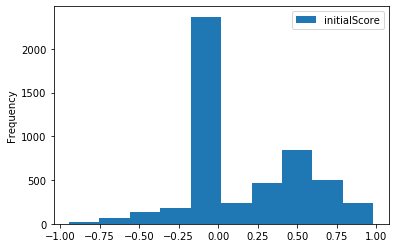

In [162]:
# unprocessed comments baseline distribution
discord_comments_df.assign(initialScore = lambda x: x.Message.apply(stripAndScore)).sort_values("initialScore").plot(kind="hist", y="initialScore")

In [164]:
sid.polarity_scores("those are fire")

{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.34}

In [165]:
lex["fire"]

-1.4

In [37]:
discord_comments_df[discord_comments_df.Emojis != ""].loc[4238, "Message"]

'First gain in two weeks 🤧'

In [99]:
discord_emotsent_dict = {'🐠': 0.462,
 '🐟': 0.724,
 '😦': -0.389,
 '🤑': 0.755,
 '🔥': 0.555,
 '😭': -0.093,
 '💦': 0.476,
 '👍': 0.522,
 '💴': 0.25,
 '💰': 0.256,
 '🙂': 0.165,
 '🤯': 0.120,
 '😢': -0.270,
 '🎬': 0.63,
 '😩': -0.368,
 '😅': 0.18,
 '💯': 0.655,
 '😂': 0.221,
 '😎': 0.493,
 '🙌': 0.56,
 '😉': 0.464,
 '👀': 0.163,
 '🤗': 0.456,
 '☝': 0.314,
 '😱': 0.19,
 '🤔': 0.112,
 '🤣': 0.442,
 '😆': 0.412,
 '💥': 0.312,
 '👑': 0.801,
 '🙏': 0.418,
 '😋': 0.634,
 '😘': 0.702,
 '😲': -0.07,
 '🚂': 0.308,
 '😁': 0.45,
 '😔': -0.146,
 '👌': 0.564,
 '\U0001f9c3': 0.265,
 '🥺': -.108,
 '🤬': -.858,
 '🐢': 0.216,
 '😄': 0.422,
 '💪': 0.556,
 '👆': 0.333,
 '🇺': 0.563,
 '🇸': 0.527,
 '🐻': 0.468,
 '🚨': 0.673,
 '🧐': 0.252,
 '🔑': 0.25,
 '🤤': 0.323,
 '💸': 0.567,
 '🏃': 0.415,
 '💵': 0.423,
 '🐐': 0.999,
 '🤙': .425,
 '🏦': 1.0,
 '😳': 0.018,
 '😤': -.211,
 '💎': 0.569,
 '🚀': 0.789,
 '✊': 0.433,
 '🍻': 0.521,
 '🥳': 0.652,
 '🤘': 0.225,
 '🤫': 0.068,
 '📈': 0.745,
 '😃': 0.558,
 '🦕': 0.059,
 '❤': 0.746,
 '🍳': 0.03,
 '🏄': 0.564,
 '🌊': 0.516,
 '🚼': 0.667,
 '✌': 0.464,
 '😍': 0.678,
 '🛥': 0.568,
 '👩': 0.074,
 '🚣': 0.727,
 '♀': 0.333,
 '💼': 0.643,
 '🤷': -.011,
 '♂': 0.2,
 '😊': 0.645,
 '😒': -0.375,
 '🖐': 0.065,
 '🕵': 0.069,
 '🐮': 0.628,
 '🔔': 1.0,
 '🤩': 0.399,
 '🍔': 0.286,
 '👇': 0.255,
 '👉': 0.394,
 '💨': 0.391,
 '😬': 0.196,
 '✅': 0.431,
 '\U0001f9be': 0.228,
 '🤦': -.205,
 '👏': 0.521,
 '🥰': 0.684,
 '🍎': 0.34,
 '🎉': 0.74,
 '🐧': 0.461,
 '🛫': 0.808,
 '🎊': 0.727,
 '📉': 0.5,
 '🤠': 0.670,
 '😏': 0.332,
 '😓': -0.081,
 '🤞': 0.009,
 '🐳': 0.15,
 '🌙': 0.621,
 '🍺': 0.504,
 '🤧': -.182,
 '🍼': 0.625,
 '😴': -0.081,
 '🇨': 0.0,
 '🇳': 0.0,
 '👐': -0.024,
 '💠': 0.113,
 '🧠': 0.602,
 '🤝': .401,
 '👨': 0.571,
 '🏫': 0.300,
 '😜': 0.456}

In [100]:
vader_values = {}
for emo, sentscore in discord_emotsent_dict.items():
    if sentscore > 0:
        sentscore = sentscore * 3.4
        sentscore = round(sentscore, 1)
        vader_values[emo] = sentscore
    else:
        sentscore = sentscore * 3.9
        sentscore = round(sentscore, 1)
        vader_values[emo] = sentscore

In [101]:
vader_values

{'🐠': 1.6,
 '🐟': 2.5,
 '😦': -1.5,
 '🤑': 2.6,
 '🔥': 1.9,
 '😭': -0.4,
 '💦': 1.6,
 '👍': 1.8,
 '💴': 0.8,
 '💰': 0.9,
 '🙂': 0.6,
 '🤯': 0.4,
 '😢': -1.1,
 '🎬': 2.1,
 '😩': -1.4,
 '😅': 0.6,
 '💯': 2.2,
 '😂': 0.8,
 '😎': 1.7,
 '🙌': 1.9,
 '😉': 1.6,
 '👀': 0.6,
 '🤗': 1.6,
 '☝': 1.1,
 '😱': 0.6,
 '🤔': 0.4,
 '🤣': 1.5,
 '😆': 1.4,
 '💥': 1.1,
 '👑': 2.7,
 '🙏': 1.4,
 '😋': 2.2,
 '😘': 2.4,
 '😲': -0.3,
 '🚂': 1.0,
 '😁': 1.5,
 '😔': -0.6,
 '👌': 1.9,
 '\U0001f9c3': 0.9,
 '🥺': -0.4,
 '🤬': -3.3,
 '🐢': 0.7,
 '😄': 1.4,
 '💪': 1.9,
 '👆': 1.1,
 '🇺': 1.9,
 '🇸': 1.8,
 '🐻': 1.6,
 '🚨': 2.3,
 '🧐': 0.9,
 '🔑': 0.8,
 '🤤': 1.1,
 '💸': 1.9,
 '🏃': 1.4,
 '💵': 1.4,
 '🐐': 3.4,
 '🤙': 1.4,
 '🏦': 3.4,
 '😳': 0.1,
 '😤': -0.8,
 '💎': 1.9,
 '🚀': 2.7,
 '✊': 1.5,
 '🍻': 1.8,
 '🥳': 2.2,
 '🤘': 0.8,
 '🤫': 0.2,
 '📈': 2.5,
 '😃': 1.9,
 '🦕': 0.2,
 '❤': 2.5,
 '🍳': 0.1,
 '🏄': 1.9,
 '🌊': 1.8,
 '🚼': 2.3,
 '✌': 1.6,
 '😍': 2.3,
 '🛥': 1.9,
 '👩': 0.3,
 '🚣': 2.5,
 '♀': 1.1,
 '💼': 2.2,
 '🤷': -0.0,
 '♂': 0.7,
 '😊': 2.2,
 '😒': -1.5,
 '🖐': 0.2,
 '🕵': 0.2,
 '🐮': 2.1,
 

In [102]:
sia.lexicon.update(vader_values)

In [116]:
sia.polarity_scores("Hi there this group is good.")

{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}

In [119]:
sia.lexicon[]

1.6

In [117]:
for sen in raw_messages:
    print(sen)
    print("----")
    scores = sia.polarity_scores(sen)
    for k, v in scores.items():
        print(f"{k.upper()} = {v}")
    print("----")

Just keep trimming trimming 🐠 🐟
----
NEG = 0.0
NEU = 1.0
POS = 0.0
COMPOUND = 0.0
----
I need some luck to see these gains. 😦
----
NEG = 0.0
NEU = 0.481
POS = 0.519
COMPOUND = 0.6597
----
10 minutes in that play haha 🤑🤑
----
NEG = 0.0
NEU = 0.481
POS = 0.519
COMPOUND = 0.6597
----
also shoutout to <@!579205396166737921> for the signal 🔥
----
NEG = 0.0
NEU = 1.0
POS = 0.0
COMPOUND = 0.0
----
So glad I got on BA😭
----
NEG = 0.0
NEU = 0.548
POS = 0.452
COMPOUND = 0.5095
----
💦💦💦
----
NEG = 0.0
NEU = 1.0
POS = 0.0
COMPOUND = 0.0
----
Tried selling but it did not go through 😦
----
NEG = 0.0
NEU = 1.0
POS = 0.0
COMPOUND = 0.0
----
Jeez nice 👍
----
NEG = 0.0
NEU = 0.263
POS = 0.737
COMPOUND = 0.4215
----
Awesome <@367506726582484996> that’s why your name is purple. Patience pays 💴 💰
----
NEG = 0.0
NEU = 0.687
POS = 0.313
COMPOUND = 0.6249
----
pog 🙂
----
NEG = 0.0
NEU = 1.0
POS = 0.0
COMPOUND = 0.0
----
noice 🙂
----
NEG = 0.0
NEU = 1.0
POS = 0.0
COMPOUND = 0.0
----
🤯🤯🤯
----
NEG = 0.0
NEU = 1.

In [122]:
sia.polarity_scores("Jeez nice")

{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}

In [123]:
sia.polarity_scores("Thomps")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [124]:
sia.lexicon.update({"thomps": 2.3})

In [133]:
sia.polarity_scores("I made some lunch money")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [141]:
sia.lexicon["((-:"]

2.1

In [166]:
emosent.EMOJI_SENTIMENT_DICT["✌"]

{'unicode_codepoint': '0x270c',
 'occurrences': 1534,
 'position': 0.790480332,
 'negative': 173.0,
 'neutral': 476.0,
 'positive': 885.0,
 'unicode_name': 'VICTORY HAND',
 'unicode_block': 'Dingbats',
 'sentiment_score': 0.464}

In [168]:
sid.polarity_scores('✌')

{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4939}

In [172]:
sid.polarity_scores("VICTORY HAND")

{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4939}

In [179]:
sid.polarity_scores("symbol")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [176]:
emosent.EMOJI_SENTIMENT_DICT['💯']

{'unicode_codepoint': '0x1f4af',
 'occurrences': 637,
 'position': 0.871819418,
 'negative': 179.0,
 'neutral': 202.0,
 'positive': 256.0,
 'unicode_name': 'HUNDRED POINTS SYMBOL',
 'unicode_block': 'Miscellaneous Symbols and Pictographs',
 'sentiment_score': 0.121}

In [183]:
sid.polarity_scores("bad_man")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [49]:
## Trying text Blob

In [51]:
import textblob

In [69]:
### Trying stanza

In [188]:
sid.lexicon.update({"bad_man": 2.3})

In [189]:
sid.polarity_scores("bad_man")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}

In [190]:
sid.polarity_scores("BAD_MAN")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}

In [194]:
sid.polarity_scores("You're a BAD MAN")

{'neg': 0.585, 'neu': 0.415, 'pos': 0.0, 'compound': -0.6408}

In [195]:
sia_original.polarity_scores("You're a BAD MAN")

{'neg': 0.679, 'neu': 0.321, 'pos': 0.0, 'compound': -0.6408}

In [196]:
sia_original.polarity_scores("You're a bad man")

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [198]:
sentiment.SentimentIntensityAnalyzer.

AttributeError: type object 'SentimentIntensityAnalyzer' has no attribute '__methods__'